In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import yfinance as yf

ModuleNotFoundError: ignored

In [ ]:
df = pdr.get_data_yahoo('PFE', start='2016-11-15',end='2021-11-15')
df['sma']=df['Adj Close'].rolling(20).mean()
df['std']=df['Adj Close'].rolling(20).std()
df['return']=np.log(df['Adj Close']/df['Adj Close'].shift(1))
df.drop(labels=['High','Low','Open','Close','Volume'],axis='columns',inplace=True)
df

,Adj Close,sma,std,return
Date,,,,
2016-11-15,25.323753,NaN,NaN,NaN
2016-11-16,25.111610,NaN,NaN,-0.008413
2016-11-17,24.930891,NaN,NaN,-0.007223
2016-11-18,24.734461,NaN,NaN,-0.007910
2016-11-21,24.805174,NaN,NaN,0.002855
...,...,...,...,...
2021-11-09,47.299999,43.471466,2.270548,-0.021542
2021-11-10,49.020000,43.869487,2.510536,0.035718
2021-11-11,50.180000,44.313117,2.801083,0.023388


In [ ]:
def RSI(price,periods):
    length = len(price)
    rsies = [np.nan] * length
    if length <= periods:
        return rsies
    up_avg = 0
    down_avg = 0

    first_t = price[:periods + 1]
    for i in range(1, len(first_t)):
        if first_t[i] >= first_t[i - 1]:
            up_avg += first_t[i] - first_t[i - 1]
        else:
            down_avg += first_t[i - 1] - first_t[i]
    up_avg = up_avg / periods
    down_avg = down_avg / periods
    rs = up_avg / down_avg
    rsies[periods] = 100 - 100 / (1 + rs)

    for j in range(periods + 1, length):
        up = 0
        down = 0
        if price[j] >= price[j - 1]:
            up = price[j] - price[j - 1]
            down = 0
        else:
            up = 0
            down = price[j - 1] - price[j]
        up_avg = (up_avg * (periods - 1) + up) / periods
        down_avg = (down_avg * (periods - 1) + down) / periods
        rs = up_avg / down_avg
        rsies[j] = 100 - 100 / (1 + rs)
    return rsies


In [ ]:
df['rsi']=RSI(df['Adj Close'],6)
df.dropna(inplace=True)
df

,Adj Close,sma,std,return,rsi
Date,,,,,
2016-12-13,25.795183,24.919499,0.341618,0.013184,73.743081
2016-12-14,25.787327,24.942678,0.383634,-0.000305,73.369910
2016-12-15,25.732327,24.973714,0.421280,-0.002135,70.378004
2016-12-16,25.803041,25.017321,0.459976,0.002744,72.131372
2016-12-19,25.795183,25.070358,0.486057,-0.000305,71.566479
...,...,...,...,...,...
2021-11-09,47.299999,43.471466,2.270548,-0.021542,67.820424
2021-11-10,49.020000,43.869487,2.510536,0.035718,75.503723
2021-11-11,50.180000,44.313117,2.801083,0.023388,79.470641


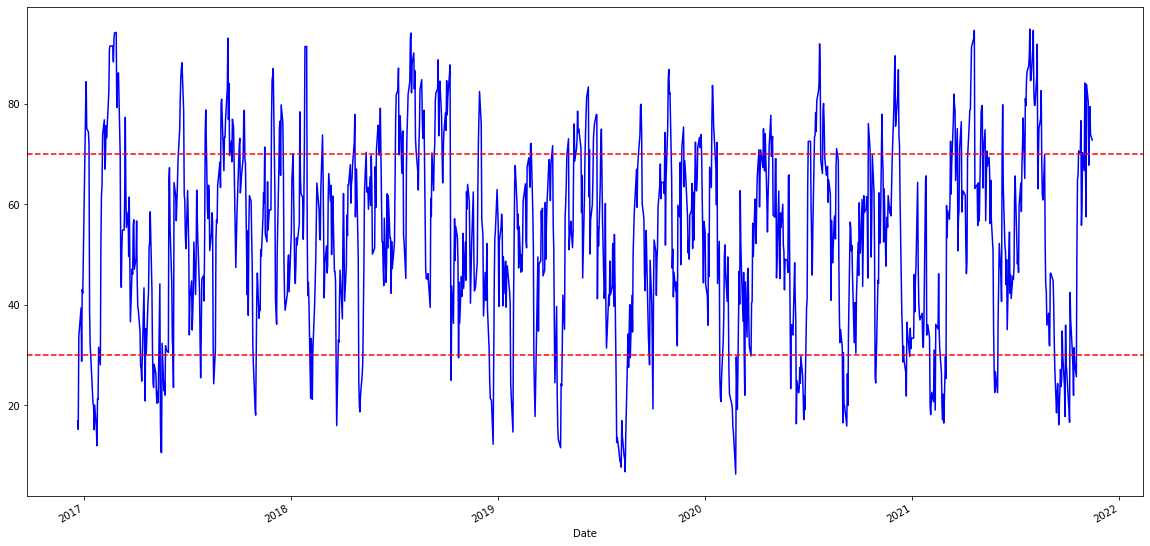

In [ ]:
df['rsi']=RSI(df['Adj Close'],6)
df['rsi'].plot(label = 'RSI', color = 'blue',figsize=(20,10))
plt.axhline(y=30, color='r', linestyle='--')
plt.axhline(y=70, color='r', linestyle='--')
plt.show()

In [ ]:
df['position']=0
df

,Adj Close,sma,std,return,rsi,position
Date,,,,,,
2016-12-13,25.795183,24.919499,0.341618,0.013184,NaN,0
2016-12-14,25.787327,24.942678,0.383634,-0.000305,NaN,0
2016-12-15,25.732327,24.973714,0.421280,-0.002135,NaN,0
2016-12-16,25.803041,25.017321,0.459976,0.002744,NaN,0
2016-12-19,25.795183,25.070358,0.486057,-0.000305,NaN,0
...,...,...,...,...,...,...
2021-11-09,47.299999,43.471466,2.270548,-0.021542,67.820424,0
2021-11-10,49.020000,43.869487,2.510536,0.035718,75.503723,0
2021-11-11,50.180000,44.313117,2.801083,0.023388,79.470641,0


In [ ]:
df['position']=0
for i in range(len(df['rsi'])):
        
    if df['rsi'].iloc[i-1]<=20 and df['rsi'].iloc[i]>20 and df['rsi'].iloc[i]<50:
            df['position'].iloc[i]=1  
                
    elif df['rsi'].iloc[i-1]>=80 and df['rsi'].iloc[i]<80 and df['rsi'].iloc[i]>50:
            df['position'].iloc[i]=-1
    else:
        df['position'].iloc[i]=df['position'].iloc[i-1]
df['position']

/Users/yumanxu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Date
2016-12-13    0
2016-12-14    0
2016-12-15    0
2016-12-16    0
2016-12-19    0
             ..
2021-11-09   -1
2021-11-10   -1
2021-11-11   -1
2021-11-12   -1
2021-11-15   -1
Name: position, Length: 1240, dtype: int64

In [ ]:
df['position'].sum()

-122

<AxesSubplot:xlabel='Date'>

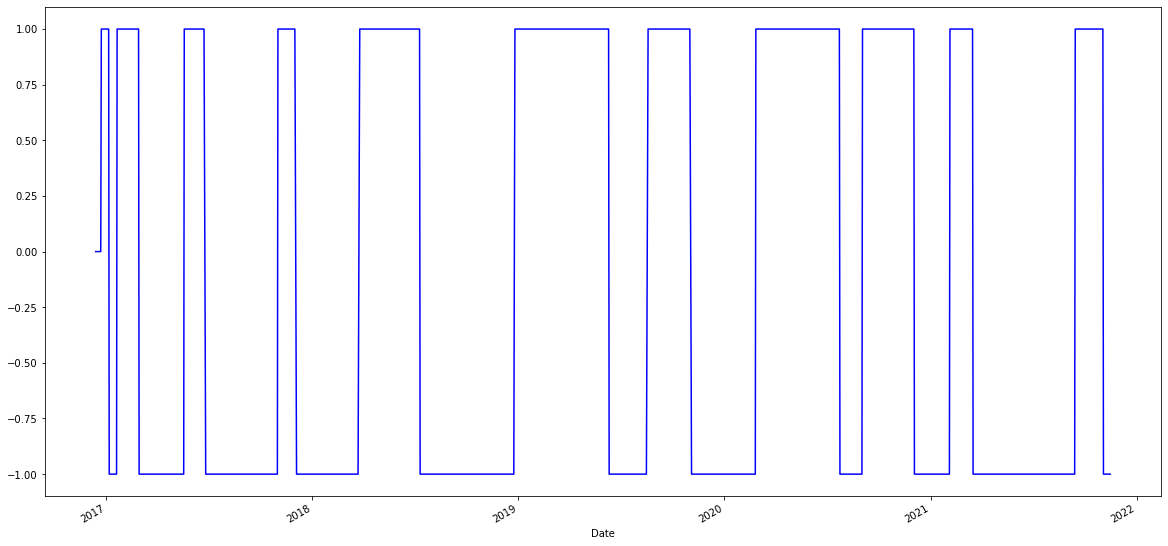

In [ ]:
df['position'].plot(color = 'blue',figsize=(20,10))

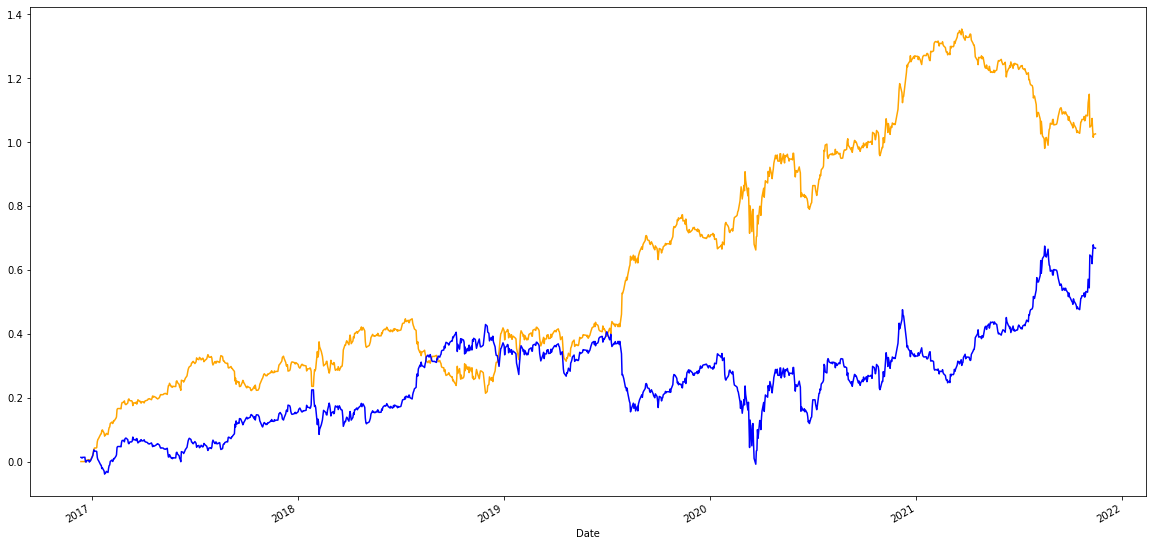

In [ ]:
df['rsi_return']=df['position']*df['return']
df['rsi_return'].cumsum().plot(label='rsi',color='orange',figsize=(20,10))
df['return'].cumsum().plot(label='buy and hold',color='blue',figsize=(20,10))
plt.show()

In [ ]:
#def bb(price, sma, std_width):
    #std = price.rolling(window = 20).std()
    #upper_bb = sma + std * std_width
    #lower_bb = sma - std * std_width
    #return upper_bb, lower_bb

In [ ]:
#df['upper_bb'], df['lower_bb'] = bb(df['Adj Close'], df['sma'], 2.1)
#df['return']=df['Close'].pct_change()

In [ ]:
#df['Adj Close'].plot(color = 'blue',figsize=(20,10))
#df['upper_bb'].plot(color = 'black',linestyle = '--', linewidth = 1)
#df['lower_bb'].plot(color = 'black',linestyle = '--', linewidth = 1)
#df['sma'].plot(color = 'orange', linestyle = '-', linewidth = 1.2)
#plt.legend(loc = 'upper left')
#plt.title('BOLLINGER BANDS')
#plt.show()